In [1]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj9.csv')

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

803

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0                The Score            455
1                    J.Fla            334
2   Thirty Seconds To Mars            244
3               Bebe Rexha            165
4        League of Legends            158
5          Imagine Dragons            145
6  Destripando la Historia            116
7        El Canto Del Loco            108
8                    Bmike             93
9             Shawn Mendes             86

<AxesSubplot:ylabel='Artist'>

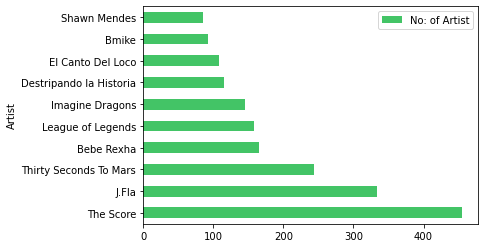

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [5]:
df1_list = df1['Artist'].head(10).tolist()

In [6]:
print(df1_list)

['The Score', 'J.Fla', 'Thirty Seconds To Mars', 'Bebe Rexha', 'League of Legends', 'Imagine Dragons', 'Destripando la Historia', 'El Canto Del Loco', 'Bmike', 'Shawn Mendes']


In [7]:
import numpy as np
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['Self Control', "Baby Don't Cut (Acoustic)", 'Glory', 'Rescue Me', 'On My Way', 'New Kings', 'Knees', 'RISE', 'Blame It On The Kids', 'High Hopes', 'Zero - From the Original Motion Picture "Ralph Breaks The Internet"', 'Stronger', 'Revolution', 'Revolution', 'Revolution', 'Revolution', 'Havana (feat. Young Thug)', 'Natural', "I'm a Mess", 'Sunflower - Spider-Man: Into the Spider-Verse', 'Pumped Up', "Don't Let Me Down", 'Say My Name', 'Perfect (feat. Haris)', 'FRIENDS', 'Heroes Never Die', 'Dance Monkey', "It Ain't Me (with Selena Gomez)", 'Hades', 'Toss A Coin To Your Witcher', 'Never Be Alone', 'Superhero', 'Bella ciao', 'Born For This', 'Nightcore - Solo', 'Warriors', 'Worlds Collide', 'Be Alright', 'Jar of Hearts', 'Worlds Collide', 'Hey, Soul Sister', 'my strange addiction', 'Legends Never Die', 'All of the Stars', 'Just Give Me a Reason (feat. Nate Ruess)', 'Someone Like You', 'When Love Takes Over (feat. Kelly Rowland)', 'Say Something', 'Say Something', 'Imagine - Remastered 2

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['6JNJERZGJwDVgkmbohBw7u', '1dE907XH5t59VzB5GaSzRZ', '79VUa2MlZsqczMmZEkOjaE', '0mjAU3yKR1QnXnHtjGJqTM', '4n7jnSxVLd8QioibtTDBDq', '3hgESJrxlX103Q78BrEAfr', '7IOxauZfx5l18mYfX0GZm6', '6QBUYxI6Ijunm0mm4yKu3m', '6bsGUcHX3dlouSNvMYH8Pk', '1rqqCSm0Qe4I9rUvWncaom', '2bzitsPcImYC6DZWvvLCQi', '4fzsfWzRhPawzqhX8Qt9F3', '7Fv8Qp3tTSbSS2VjryUF7L', '7Fv8Qp3tTSbSS2VjryUF7L', '7Fv8Qp3tTSbSS2VjryUF7L', '7Fv8Qp3tTSbSS2VjryUF7L', '1rfofaqEpACxVEHIZBJe6W', '14x69MW6uBfmmICmaI7gz0', '5GHK6FdDM6AOhxBHCEVdWP', '0RiRZpuVRbi7oqRdSMwhQY', '7w87IxuO7BDcJ3YUqCyMTT', '44mm7paG7axYqrLHJN98v7', '3GYlQmwfBDo7imFyGPhrl7', '30cW9fD87IgbYFl8o0lUze', '08bNPGLD8AhKpnnERrAc6G', '4Cp2SbefzBUM2txtyzV61W', '5ZULALImTm80tzUbYQYM9d', '3eR23VReFzcdmS7TYCrhCe', '04LUmqZOsmanOAqiqnyJ3S', '2KMLGJ1mPfRE4GNdL92rl3', '3BYyBzKGPOCHeginhe0F77', '7EYv3adMrIC5mqurz7fHhD', '1geovaCdfs5fSa4NNgFPVe', '7uCBGNn991AM68fR4tSDco', '1LUyHPbfI0EXbMkvHR0PNX', '1sWeSMifj6Z6kZyI6z3bRc', '6KMgPewrVRxzeFzRwkFa0M', '3EPXxR3ImUwfayaurPi3cm', '0HZhYMZOcU

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

4741


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 4741/4741 [08:21<00:00,  9.45it/s]


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  6JNJERZGJwDVgkmbohBw7u   0.686    0.1550  106.679       0.0342   
1  1dE907XH5t59VzB5GaSzRZ   0.328    0.1500   76.056       0.0966   
2  79VUa2MlZsqczMmZEkOjaE   0.647    0.0739  124.021       0.0636   
3  0mjAU3yKR1QnXnHtjGJqTM   0.605    0.6940  121.049       0.0433   
4  4n7jnSxVLd8QioibtTDBDq   0.689    0.3010  170.087       0.1020   

   acousticness  instrumentalness  time_signature  danceability  key  \
0        0.2190           0.00382               4         0.814    6   
1        0.8420           0.00000               4         0.566    0   
2        0.6030           0.00000               4         0.557    6   
3        0.1560           0.00000               4         0.759    7   
4        0.0209           0.00000               4         0.509    1   

   duration_ms  loudness  valence  mode                             track_uri  
0       246440   -12.172    0.778     0  spotify:track:6JNJERZGJwDVgkmbohBw7u  
1       249055   -16.926    0.711     1  spotify:track:1dE907XH5t59VzB5GaSzRZ  
2       281866    -5.851    0.266     1  spotify:track:79VUa2MlZsqczMmZEkOjaE  
3       158900    -7.737    0.640     1  spotify:track:0mjAU3yKR1QnXnHtjGJqTM  
4       193798    -4.929    0.297     0  spotify:track:4n7jnSxVLd8QioibtTDBDq

In [20]:
audioFeaturesDF_AllTracks.shape

(4741, 15)

In [21]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [22]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [23]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   6JNJERZGJwDVgkmbohBw7u   0.686    0.1550  106.679       0.0342   
1   1dE907XH5t59VzB5GaSzRZ   0.328    0.1500   76.056       0.0966   
2   79VUa2MlZsqczMmZEkOjaE   0.647    0.0739  124.021       0.0636   
3   0mjAU3yKR1QnXnHtjGJqTM   0.605    0.6940  121.049       0.0433   
4   4n7jnSxVLd8QioibtTDBDq   0.689    0.3010  170.087       0.1020   
5   3hgESJrxlX103Q78BrEAfr   0.817    0.3840   76.004       0.0481   
6   7IOxauZfx5l18mYfX0GZm6   0.577    0.0869  109.019       0.0357   
7   6QBUYxI6Ijunm0mm4yKu3m   0.791    0.2380  106.089       0.0324   
8   6bsGUcHX3dlouSNvMYH8Pk   0.441    0.1630  133.019       0.1720   
9   1rqqCSm0Qe4I9rUvWncaom   0.904    0.0640   82.014       0.0618   
10  2bzitsPcImYC6DZWvvLCQi   0.662    0.1110   90.011       0.0325   
11  4fzsfWzRhPawzqhX8Qt9F3   0.717    0.4080  103.992       0.1530   
12  7Fv8Qp3tTSbSS2VjryUF7L   0.833    0.1050   86.008       0.0563   
13  7Fv8Qp3tTSbSS2VjryUF7L   0.833    0.1050   86.008       0.0563   
14  7Fv8Qp3tTSbSS2VjryUF7L   0.833    0.1050   86.008       0.0563   
15  7Fv8Qp3tTSbSS2VjryUF7L   0.833    0.1050   86.008       0.0563   
16  1rfofaqEpACxVEHIZBJe6W   0.523    0.1320  104.988       0.0300   
17  14x69MW6uBfmmICmaI7gz0   0.611    0.0812   99.994       0.0410   
18  5GHK6FdDM6AOhxBHCEVdWP   0.697    0.0719   97.008       0.0254   
19  0RiRZpuVRbi7oqRdSMwhQY   0.522    0.0685   89.960       0.0575   

    acousticness  instrumentalness  time_signature  danceability  key  \
0       0.219000          0.003820               4         0.814    6   
1       0.842000          0.000000               4         0.566    0   
2       0.603000          0.000000               4         0.557    6   
3       0.156000          0.000000               4         0.759    7   
4       0.020900          0.000000               4         0.509    1   
5       0.014700          0.000102               4         0.558    4   
6       0.078100          0.000001               4         0.777   11   
7       0.360000          0.000000               4         0.694    1   
8       0.359000          0.000000               4         0.719    6   
9       0.193000          0.000000               4         0.579    5   
10      0.000479          0.001420               4         0.634    6   
11      0.005640          0.000000               4         0.617   10   
12      0.061100          0.000000               4         0.574    8   
13      0.061100          0.000000               4         0.574    8   
14      0.061100          0.000000               4         0.574    8   
15      0.061100          0.000000               4         0.574    8   
16      0.184000          0.000036               4         0.765    2   
17      0.217000          0.000000               4         0.704    2   
18      0.002850          0.000000               4         0.631   11   
19      0.533000          0.000000               4         0.755    2   

    duration_ms  loudness  valence  mode                             track_uri  
0        246440   -12.172    0.778     0  spotify:track:6JNJERZGJwDVgkmbohBw7u  
1        249055   -16.926    0.711     1  spotify:track:1dE907XH5t59VzB5GaSzRZ  
2        281866    -5.851    0.266     1  spotify:track:79VUa2MlZsqczMmZEkOjaE  
3        158900    -7.737    0.640     1  spotify:track:0mjAU3yKR1QnXnHtjGJqTM  
4        193798    -4.929    0.297     0  spotify:track:4n7jnSxVLd8QioibtTDBDq  
5        234613    -3.619    0.429     1  spotify:track:3hgESJrxlX103Q78BrEAfr  
6        206581    -6.872    0.381     0  spotify:track:7IOxauZfx5l18mYfX0GZm6  
7        193773    -4.679    0.628     1  spotify:track:6QBUYxI6Ijunm0mm4yKu3m  
8        196341    -6.266    0.504     0  spotify:track:6bsGUcHX3dlouSNvMYH8Pk  
9        190947    -2.729    0.681     1  spotify:track:1rqqCSm0Qe4I9rUvWncaom  
10       210933    -7.543    0.244     1  spotify:track:2bzitsPcImYC6DZWvvLCQi  
11       311867    -7.858    0.490     0 